## Short demonstration of our VGG16 network trained from scratch on images of pages from early modern printed books

Provide the classifier with an image of a book page and it will predict whether the page contains an illustration or not

In [17]:
#Load the required modules
from PIL import Image
import requests
import matplotlib.pyplot as plt
import time

import numpy as np

import keras

from keras.preprocessing import image
from keras.models import Model
from keras.models import model_from_json
from keras.applications.vgg16 import preprocess_input


In [18]:
#load our pretrained network with VGG16 architecture
modelPath='VGG16_from_scratch_1/'
json_file = open(modelPath+'model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

# load weights into new model
model.load_weights(modelPath+'/model_weights.h5')

## Provide a pageimage

Please provide the URL of a pageimage of an early modern print or copy and paste one of the examples below. Then press enter.
http://digilib.mpiwg-berlin.mpg.de/digitallibrary/servlet/Scaler?fn=/permanent/library/PUBSU9QD/pageimg&pn=8&dw=1314
http://digilib.mpiwg-berlin.mpg.de/digitallibrary/servlet/Scaler?fn=/permanent/library/PUBSU9QD/pageimg&pn=6&dw=1314

http://digilib.mpiwg-berlin.mpg.de/digitallibrary/servlet/Scaler?fn=/permanent/library/PUBSU9QD/pageimg&pn=106&dw=1314&dh=752

Here is your image:


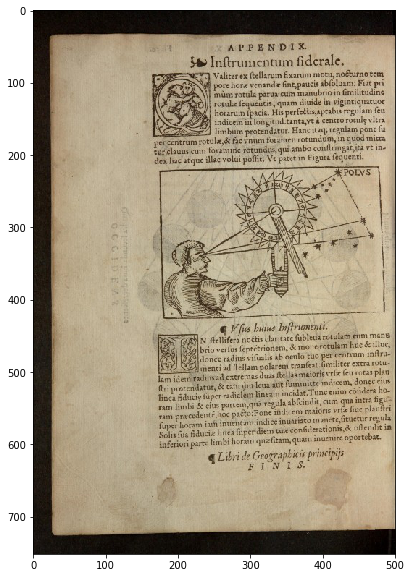

In [23]:
#request an image URL from the user

example_url='http://digilib.mpiwg-berlin.mpg.de/digitallibrary/servlet/Scaler?fn=/permanent/library/PUBSU9QD/pageimg&pn=8&dw=1314\nhttp://digilib.mpiwg-berlin.mpg.de/digitallibrary/servlet/Scaler?fn=/permanent/library/PUBSU9QD/pageimg&pn=6&dw=1314\n'
url = input('Please provide the URL of a pageimage of an early modern print or copy and paste one of the examples below. Then press enter.\n{}\n'
            .format(example_url))



try:
    response = requests.get(url, stream=True)
    time.sleep(2)
    user_img = Image.open(response.raw)
    print('\nHere is your image:')
    plt.figure(figsize=(10,10))
    plt.imshow(user_img)
    plt.show()
except:
    print('Something went wrong! Are you sure there is an image at: {}'.format(url))

In [24]:
#preprocess the image
H, W = 224, 224
img = user_img.resize((W,H))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

## Predict if the pageimage contains an illustration

In [25]:
single_prediction = model.predict(img)
classes=['a content illustration','no content illustration']
print('Our model is {:.2f} percent confident that there is {} on the page'
      .format(single_prediction[0,np.argmax(single_prediction)]*100 , classes[np.argmax(single_prediction)]))

Our model is 99.99 percent confident that there is a content illustration on the page
